In [387]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import librosa.display
import librosa

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, learning_curve, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA
from matplotlib.colors import ListedColormap

In [388]:
# data_music = [None] * 2

# data_music[0], sr = librosa.load('./Data/genres_original/blues/blues.00000.wav')
# data_music[1], sr = librosa.load('./Data/genres_original/classical/classical.00000.wav')
# data_music[2], sr = librosa.load('./Data/genres_original/jazz/jazz.00000.wav')
# data_music[3], sr = librosa.load('./Data/genres_original/rock/rock.00000.wav')
# data_music[4], sr = librosa.load('./Data/genres_original/pop/pop.00000.wav')
# data_music[2], sr = librosa.load('./Data/genres_original/hiphop/hiphop.00000.wav')

In [389]:
color = ['green', 'pink', 'skyblue']#, 'red']
markers = ['o', '^', 's']#, '.']
genre = ['Classical', 'Jazz', 'Pop']#, 'Rock']

## Visualizations

### Waveform Visualization

In [390]:
for i in range(0,len(data_music)) :
    plt.figure(figsize=(14, 5))
    librosa.display.waveshow(data_music[i], sr=sr, color=color[i])

    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.title(f'Waveform of the Genre {genre[i]}')
    plt.show()

ParameterError: Audio data must be of type numpy.ndarray

<Figure size 1400x500 with 0 Axes>

### Spectogram

In [ ]:
for i in range(0, len(data_music)) :
    stft = librosa.stft(data_music[i])
    stft_db = librosa.amplitude_to_db(abs(stft))
    plt.figure(figsize =(14, 6))
    librosa.display.specshow(stft_db, sr=sr, x_axis = 'time', y_axis = 'hz')
    plt.title(f'Spectrogram for Genre {genre[i]}')
    plt.colorbar()

### Spectral Rolloff

In [ ]:
for i in range(0,len(data_music)) :
    spectral_rolloff = librosa.feature.spectral_rolloff(y = data_music[i], sr=sr)
    plt.figure(figsize = (12, 4))
    librosa.display.waveshow(data_music[i], sr=sr, alpha = 0.4, color=color[i])
    plt.title(f'Spectral Rolloff for Genre {genre[i]}')

### Chroma Feature

In [ ]:
for i in range(0, len(data_music)) :
    chroma = librosa.feature.chroma_stft(y = data_music[i], sr = sr)
    plt.figure(figsize = (16,6))
    librosa.display.specshow(chroma, sr = sr, x_axis='time', y_axis='chroma', cmap='coolwarm')
    plt.colorbar()
    plt.title(f'Chroma Feature for Genre {genre[i]}')
    plt.show()

### MFCC

In [ ]:
for i in range(0, len(data_music)) :
    mfccs = librosa.feature.mfcc(y=data_music[i], sr=sr, n_mfcc=13)
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfccs, x_axis='time', sr=sr, cmap='coolwarm')
    plt.colorbar()
    plt.title(f'MFCC for Genre {genre[i]}')
    plt.show()

### Zero Crossing Rate

In [ ]:
start = 1000
end = 1200
for i in range(0, len(data_music)) :
    plt.figure(figsize=(14,5))
    plt.plot(data_music[i][start:end], color=color[i])
    plt.title(f'Zero Crossing Rate for Genre {genre[i]}')
    plt.grid()

    zero_cross_rate = librosa.zero_crossings(data_music[i][start:end], pad=False)
    print("The number of zero-crossing is : ", sum(zero_cross_rate))
    plt.show()

## Main

### Data

In [391]:
music_data = pd.DataFrame()
for i in range(0, len(genre)) :
    music_data_i = pd.read_csv(f'../csv/{genre[i]}/data.csv')
    music_data_i = music_data_i.assign(label=[genre[i]]*len(music_data_i))
    music_data = pd.concat([music_data, music_data_i])

music_data = music_data.drop(['filename','duration'], axis=1)
music_data = music_data.drop_duplicates()

# music_data = music_data.filter(regex=r'^(?!.*var).*$', axis=1)

music_data = music_data.reset_index(drop=True)

print(music_data['label'].value_counts())

music_data.groupby(['label']).head(2)

label
Classical    379
Pop          160
Jazz         108
Name: count, dtype: int64


,chroma_stft_mean,chroma_stft_var,rms_mean,rms_var,spectral_centroid_mean,spectral_centroid_var,spectral_bandwidth_mean,spectral_bandwidth_var,rolloff_mean,rolloff_var,...,mfccs_var16,mfccs_mean17,mfccs_var17,mfccs_mean18,mfccs_var18,mfccs_mean19,mfccs_var19,mfccs_mean20,mfccs_var20,label
0,0.276075,0.093844,0.166951,0.004944,782.592678,62640.580307,955.123166,90152.160862,1258.683741,237964.373952,...,108.600647,-3.954874,109.064774,-3.262164,131.658218,-2.002953,127.042915,-3.934046,147.002304,Classical
1,0.254195,0.092907,0.149219,0.004594,901.733695,65815.508607,1107.821675,109417.856035,1449.188066,291332.913336,...,103.831940,-5.060879,97.632538,-4.166760,139.730026,-6.535567,165.151093,-9.489383,175.699722,Classical
379,0.240474,0.103508,0.121386,0.006906,814.181515,96189.023966,787.875741,108930.774652,1243.857492,365007.785576,...,135.754959,-0.121858,144.281174,3.211972,134.971054,3.919665,167.577484,0.269917,192.727875,Jazz
380,0.320582,0.110327,0.081006,0.005798,640.700738,142009.220776,711.931439,250232.037662,1109.412628,869231.723715,...,68.550400,-1.519409,50.541706,0.782575,53.044582,-2.954154,92.060539,-5.372255,68.177650,Jazz
487,0.244843,0.099295,0.191966,0.005665,744.912427,44987.399283,870.869491,94293.207940,1140.299648,256159.777860,...,109.733528,0.385426,103.576836,7.007708,114.024162,11.641551,118.777649,7.142726,136.247025,Pop
488,0.400785,0.130642,0.088821,0.006424,484.117484,107056.261449,565.895725,165919.676915,893.373778,540813.713035,...,101.721367,-6.289391,76.936325,-4.893848,99.053635,-2.389234,103.925621,-0.923158,165.205902,Pop


In [392]:
# Transforming Features
class_list = music_data.iloc[:, -1]
convertor = LabelEncoder()
y = convertor.fit_transform(class_list)

convertor.classes_

/home/bhavb/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
/home/bhavb/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


array(['Classical', 'Jazz', 'Pop'], dtype=object)

In [393]:
# Scaling of Features
fit = StandardScaler()
X = fit.fit_transform(np.array(music_data.iloc[:, :-1], dtype = float))

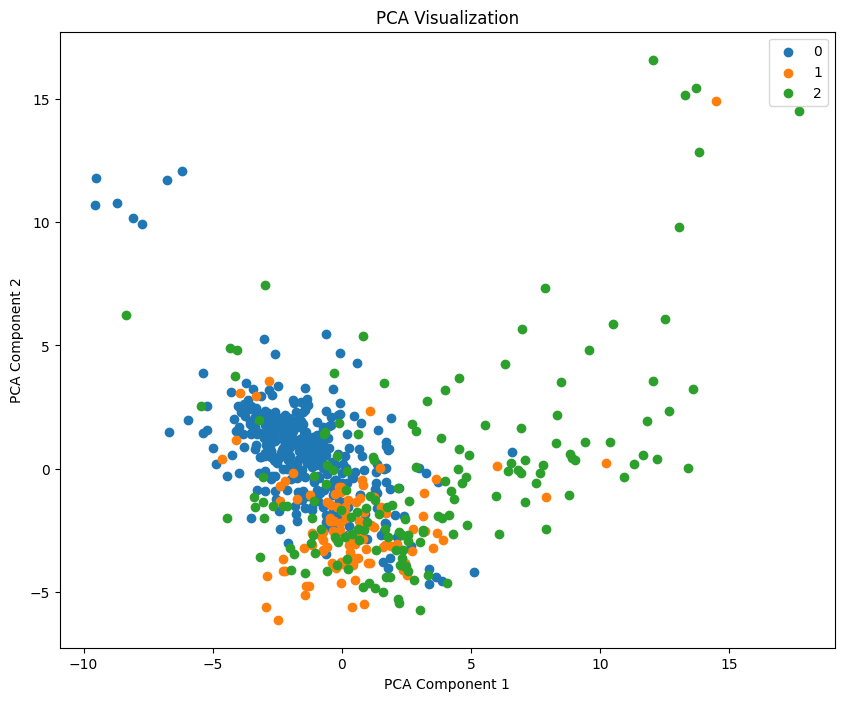

In [394]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.legend()
plt.show()


In [395]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

### KNN

In [396]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate the classifier's performance
accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 83.08%


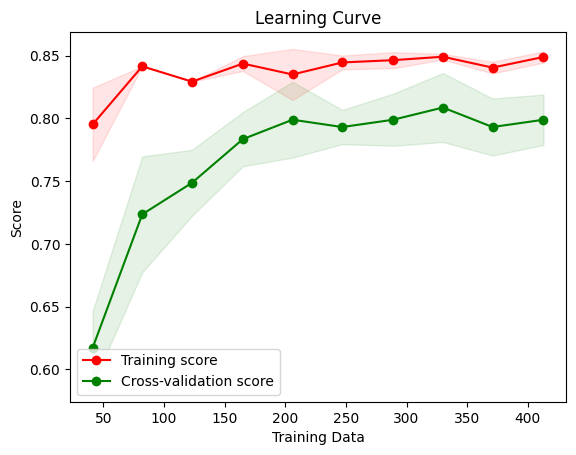

In [397]:
train_sizes, train_scores, test_scores = learning_curve(knn, X_train, y_train, train_sizes=np.linspace(0.1, 1.0, 10), cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

plt.figure()
plt.title("Learning Curve")
plt.xlabel("Training Data")
plt.ylabel("Score")

plt.grid()

plt.grid()

plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")

plt.legend(loc="best")
plt.show()

In [398]:
grid_params = { 'n_neighbors' : [3,5,7,9,11,13,15],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan', 'cosine']}

In [399]:
gs = GridSearchCV(knn, grid_params, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
best_params = g_res.best_params_

print(best_params)

Fitting 3 folds for each of 56 candidates, totalling 168 fits
{'metric': 'cosine', 'n_neighbors': 9, 'weights': 'distance'}


In [400]:
knn = KNeighborsClassifier(n_neighbors=best_params['n_neighbors'], weights=best_params['weights'], metric=best_params['metric'])
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

accuracy_knn = accuracy_score(y_test, y_pred_knn)
print(f'Accuracy: {accuracy_knn * 100:.2f}%')

Accuracy: 82.31%


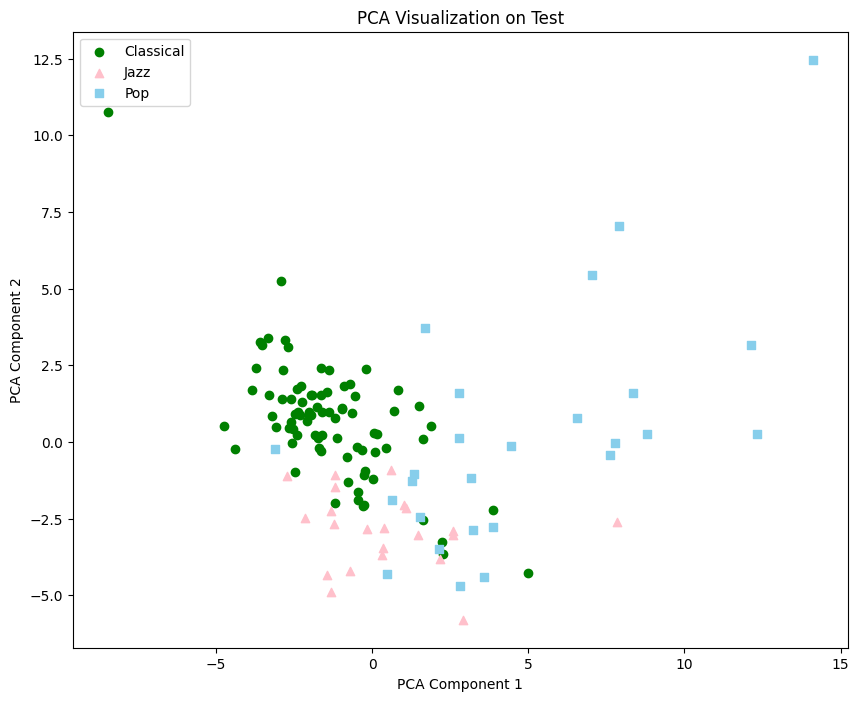

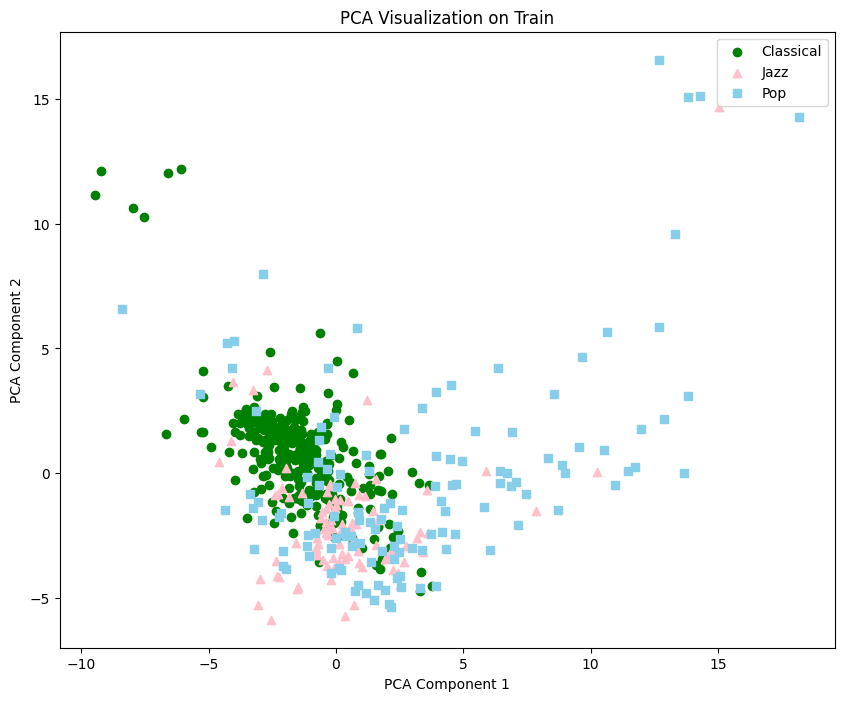

In [401]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
y_train_knn = knn.predict(X_train)
X_test_pca = pca.transform(X_test)




cmap = ListedColormap(color[:len(np.unique(y_pred_knn))])

plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_pred_knn)):
    plt.scatter(x=X_test_pca[y_pred_knn == cl, 0], y=X_test_pca[y_pred_knn == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Test')
plt.legend()
plt.show()

cmap = ListedColormap(color[:len(np.unique(y_train_knn))])
plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_train_knn)):
    plt.scatter(x=X_train_pca[y_train_knn == cl, 0], y=X_train_pca[y_train_knn == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Train')
plt.legend()
plt.show()

In [402]:
y_hat = knn.predict(X_train)
y_knn = knn.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.823076923076923


### Decision Tree

In [403]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt * 100:.2f}%')

Accuracy: 73.08%


In [404]:
param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [2, 4, 6, 8, 10, 12, 14, 16],
                'min_samples_split': [2, 4, 6, 8, 10, 12, 14]}

gs = GridSearchCV(dt, param_grid, cv=3, n_jobs=-1)
g_res = gs.fit(X_train, y_train)
best_params = g_res.best_params_
best_params

# best_params = {'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 14}

{'criterion': 'gini', 'max_depth': 6, 'min_samples_split': 6}

In [405]:
dt = DecisionTreeClassifier(criterion=best_params['criterion'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'])
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

accuracy_dt = accuracy_score(y_test, y_pred_dt)
print(f'Accuracy: {accuracy_dt * 100:.2f}%')

Accuracy: 84.62%


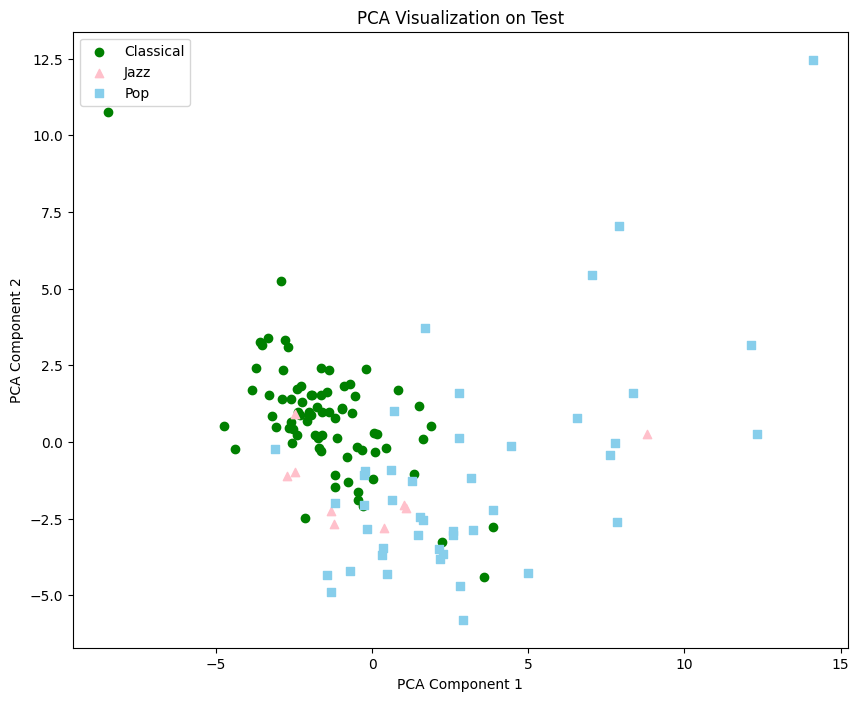

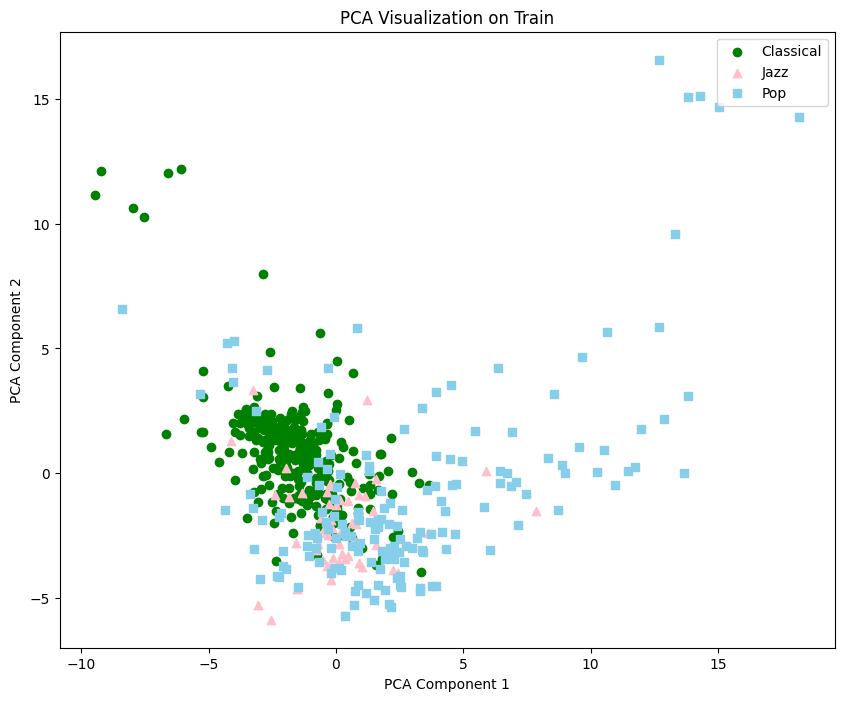

In [406]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
y_train_dt = dt.predict(X_train)
X_test_pca = pca.transform(X_test)




cmap = ListedColormap(color[:len(np.unique(y_pred_dt))])

plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_pred_dt)):
    plt.scatter(x=X_test_pca[y_pred_dt == cl, 0], y=X_test_pca[y_pred_dt == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Test')
plt.legend()
plt.show()

cmap = ListedColormap(color[:len(np.unique(y_train_dt))])
plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_train_dt)):
    plt.scatter(x=X_train_pca[y_train_dt == cl, 0], y=X_train_pca[y_train_dt == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Train')
plt.legend()
plt.show()

In [407]:
y_hat = dt.predict(X_train)
y_dt = dt.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_dt))

Training set accuracy:  0.8955512572533849
Test set accuracy:  0.8461538461538461


### MLP Classifier

In [408]:
mlp = MLPClassifier(hidden_layer_sizes=(100, 75), activation='relu', solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08)
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluate the classifier's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy: {accuracy_mlp * 100:.2f}%')


Accuracy: 85.38%


In [409]:
param_grid = {
    'hidden_layer_sizes': [(100, 75), (100, 50), (150, 90)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant', 'adaptive'],
    'max_iter': [1000, 3000]
    }

gs = GridSearchCV(mlp, param_grid, verbose = 1, cv=3, n_jobs = -1)
g_res = gs.fit(X_train, y_train)
best_params = g_res.best_params_
best_params

# best_params = {'activation': 'logistic',
#  'alpha': 0.0001,
#  'hidden_layer_sizes': (100, 75),
#  'learning_rate': 'constant',
#  'max_iter': 3000,
#  'solver': 'adam'}



Fitting 3 folds for each of 144 candidates, totalling 432 fits


/home/bhavb/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bhavb/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bhavb/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bhavb/.local/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(
/home/bhavb/.local/lib/python3.10/site-packages/

{'activation': 'relu',
 'alpha': 0.0001,
 'hidden_layer_sizes': (100, 75),
 'learning_rate': 'adaptive',
 'max_iter': 3000,
 'solver': 'adam'}

In [410]:
mlp = MLPClassifier(hidden_layer_sizes=best_params['hidden_layer_sizes'], activation=best_params['activation'], solver=best_params['solver'], alpha=best_params['alpha'], learning_rate=best_params['learning_rate'], max_iter=best_params['max_iter'])
mlp.fit(X_train, y_train)
y_pred_mlp = mlp.predict(X_test)

# Evaluate the classifier's performance
accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
print(f'Accuracy: {accuracy_mlp * 100:.2f}%')

Accuracy: 83.08%


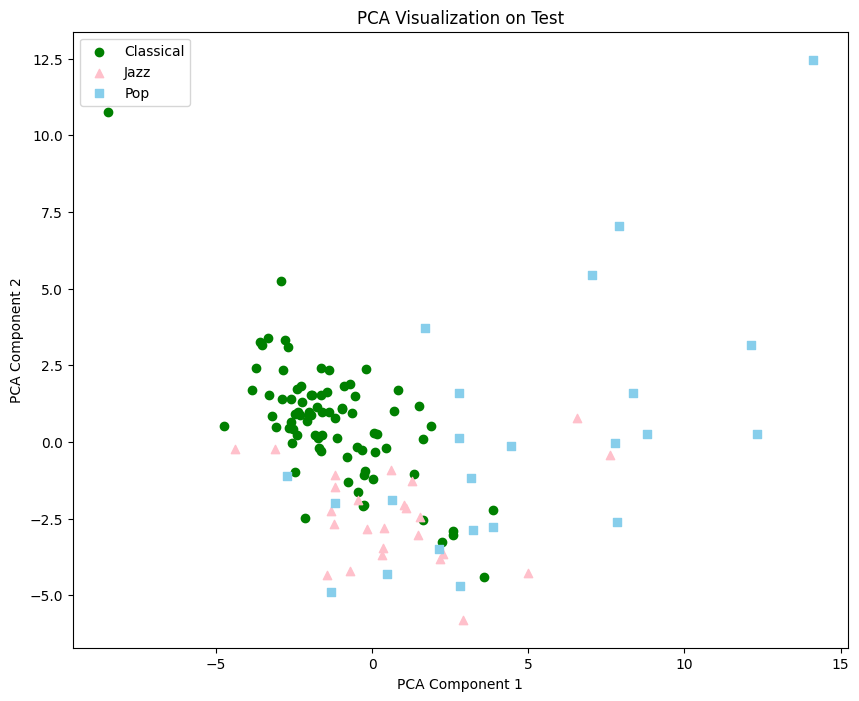

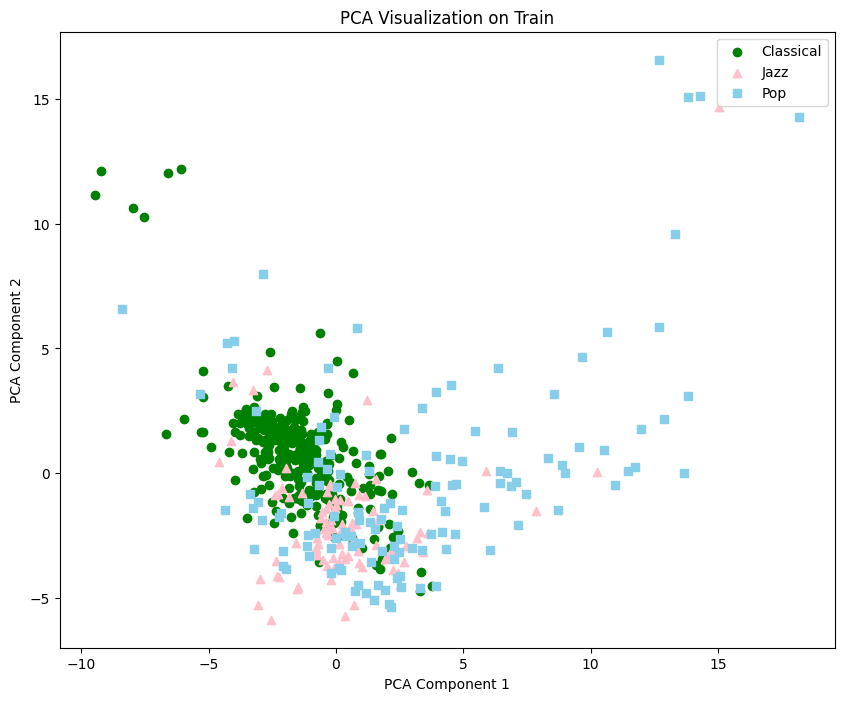

In [411]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
y_train_mlp = mlp.predict(X_train)
X_test_pca = pca.transform(X_test)




cmap = ListedColormap(color[:len(np.unique(y_pred_mlp))])

plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_pred_mlp)):
    plt.scatter(x=X_test_pca[y_pred_mlp == cl, 0], y=X_test_pca[y_pred_mlp == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Test')
plt.legend()
plt.show()

cmap = ListedColormap(color[:len(np.unique(y_train_mlp))])
plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_train_mlp)):
    plt.scatter(x=X_train_pca[y_train_mlp == cl, 0], y=X_train_pca[y_train_mlp == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Train')
plt.legend()
plt.show()

In [412]:
y_hat = mlp.predict(X_train)
y_mlp = mlp.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_mlp))

Training set accuracy:  1.0
Test set accuracy:  0.8307692307692308


### Random Forest

In [413]:
from sklearn.ensemble import RandomForestClassifier

# Create an instance of the RandomForestClassifier class
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

# Evaluate the classifier's performance
accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy: {accuracy_rfc * 100:.2f}%')


Accuracy: 92.31%


In [414]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(rfc, param_grid, verbose=1, cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)
best_params = grid_search.best_params_
# best_params = {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}

print(best_params)


Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'max_depth': 5, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}


In [415]:
rfc = RandomForestClassifier(n_estimators=best_params['n_estimators'], max_depth=best_params['max_depth'], min_samples_split=best_params['min_samples_split'], min_samples_leaf=best_params['min_samples_leaf'])
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)

accuracy_rfc = accuracy_score(y_test, y_pred_rfc)
print(f'Accuracy: {accuracy_rfc * 100:.2f}%')

Accuracy: 83.85%


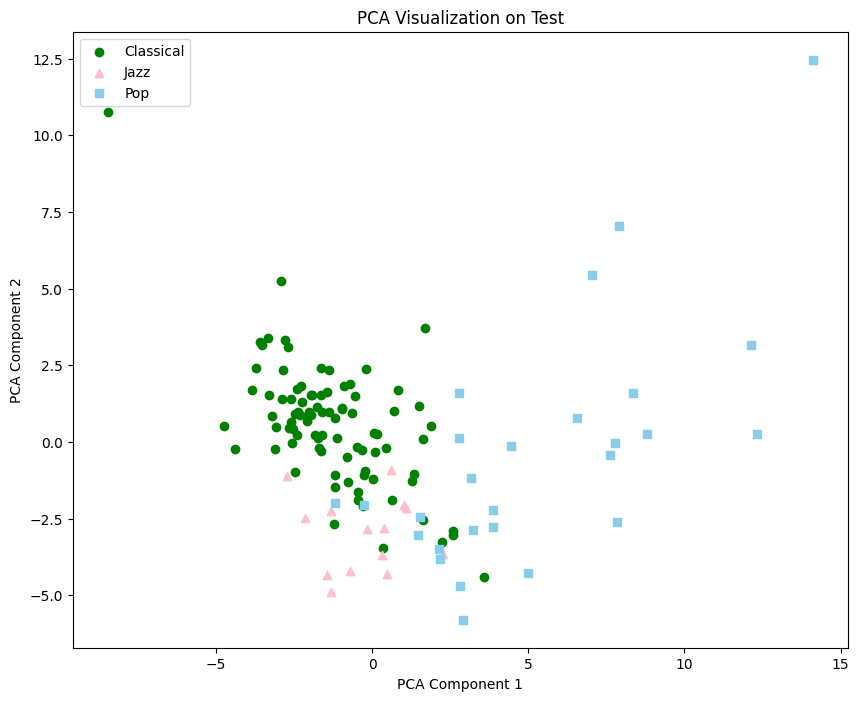

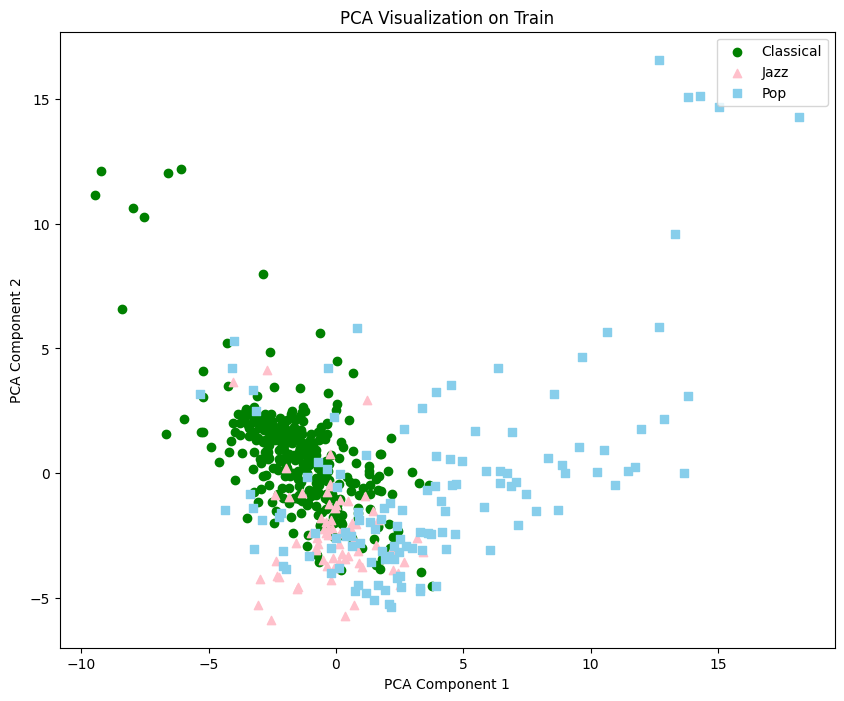

In [416]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
y_train_rfc = rfc.predict(X_train)
X_test_pca = pca.transform(X_test)




cmap = ListedColormap(color[:len(np.unique(y_pred_rfc))])

plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_pred_rfc)):
    plt.scatter(x=X_test_pca[y_pred_rfc == cl, 0], y=X_test_pca[y_pred_rfc == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Test')
plt.legend()
plt.show()

cmap = ListedColormap(color[:len(np.unique(y_train_rfc))])
plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_train_rfc)):
    plt.scatter(x=X_train_pca[y_train_rfc == cl, 0], y=X_train_pca[y_train_rfc == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Train')
plt.legend()
plt.show()

In [417]:
y_hat = rfc.predict(X_train)
y_rfc = rfc.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_rfc))

Training set accuracy:  0.9245647969052224
Test set accuracy:  0.8384615384615385


### Stacking

In [418]:
from sklearn.ensemble import StackingClassifier

estimators = [
    ('knn', knn),
    ('rfc', rfc),
    ('dt', dt)
]

stacking = StackingClassifier(estimators=estimators, final_estimator=DecisionTreeClassifier())
stacking.fit(X_train, y_train)
y_pred_stacking = stacking.predict(X_test)

# Evaluate the classifier's performance
accuracy_stacking = accuracy_score(y_test, y_pred_stacking)
print(f'Accuracy: {accuracy_stacking * 100:.2f}%')

Accuracy: 80.77%


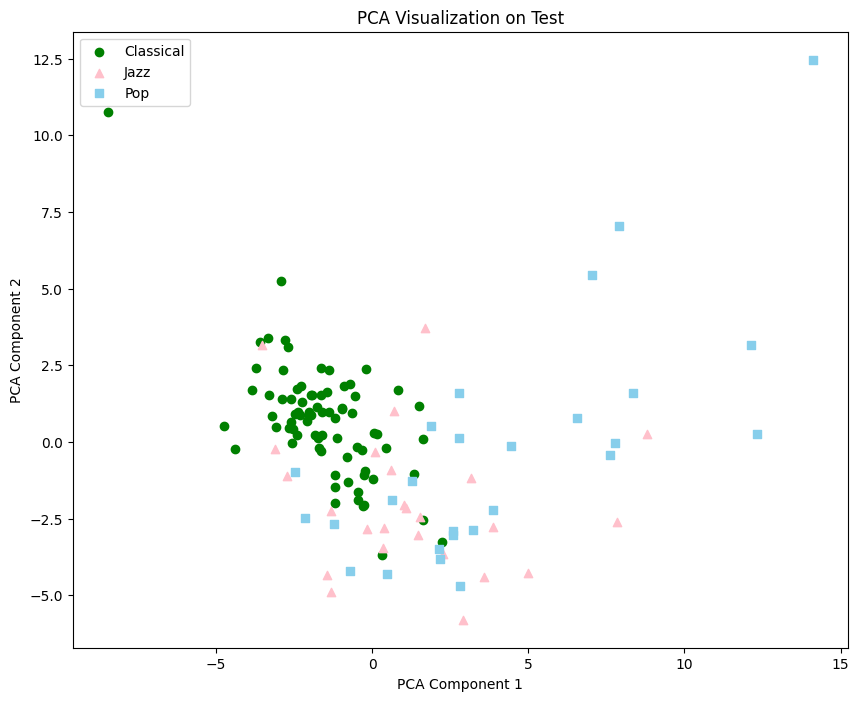

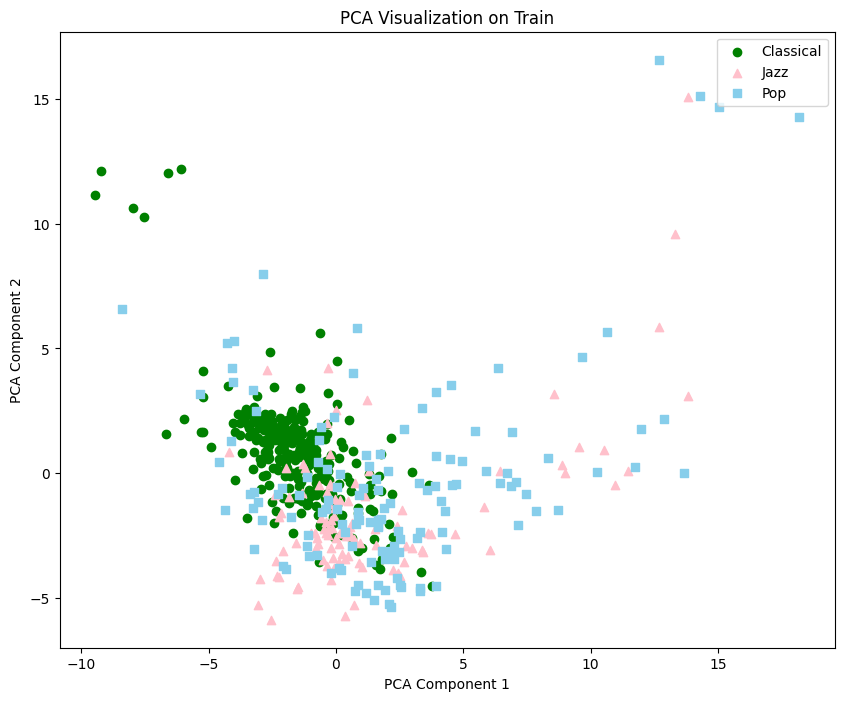

In [419]:
pca = PCA(n_components=2)

X_train_pca = pca.fit_transform(X_train)
y_train_stacking = stacking.predict(X_train)
X_test_pca = pca.transform(X_test)

cmap = ListedColormap(color[:len(np.unique(y_pred_stacking))])

plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_pred_stacking)):
    plt.scatter(x=X_test_pca[y_pred_stacking == cl, 0], y=X_test_pca[y_pred_stacking == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Test')
plt.legend()
plt.show()

cmap = ListedColormap(color[:len(np.unique(y_train_stacking))])
plt.figure(figsize=(10, 8))
for idx, cl in enumerate(np.unique(y_train_stacking)):
    plt.scatter(x=X_train_pca[y_train_stacking == cl, 0], y=X_train_pca[y_train_stacking == cl, 1], color=cmap(idx), marker=markers[idx], label=convertor.inverse_transform([cl,])[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization on Train')
plt.legend()
plt.show()

In [420]:
y_hat = stacking.predict(X_train)
y_stacking = stacking.predict(X_test)

print('Training set accuracy: ', accuracy_score(y_train, y_hat))
print('Test set accuracy: ', accuracy_score(y_test, y_stacking))

Training set accuracy:  0.8336557059961315
Test set accuracy:  0.8076923076923077


### Prediction

In [421]:
def calculate_features(filename):
    y, sr = librosa.load(filename)

    # Chroma feature
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)
    chroma_stft_var = np.var(chroma_stft)

    # RMS energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)
    rms_var = np.var(rms)

    # Spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid)
    spectral_centroid_var = np.var(spectral_centroid)

    # Spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)
    spectral_bandwidth_var = np.var(spectral_bandwidth)

    # Spectral rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)
    rolloff_var = np.var(rolloff)

    # Zero crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)
    zero_crossing_rate_var = np.var(zero_crossing_rate)

    # Harmonic-to-percussive ratio
    harmonic, percussive = librosa.effects.hpss(y)
    harmony_mean = np.mean(harmonic)
    harmony_var = np.var(harmonic)
    perceptr_mean = np.mean(percussive)
    perceptr_var = np.var(percussive)

    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)
    mfccs_var = np.var(mfccs, axis=1)

    # Combine all the features into a single list
    features = [
        chroma_stft_mean, chroma_stft_var, rms_mean, rms_var,
        spectral_centroid_mean, spectral_centroid_var,
        spectral_bandwidth_mean, spectral_bandwidth_var,
        rolloff_mean, rolloff_var,
        zero_crossing_rate_mean, zero_crossing_rate_var,
        harmony_mean, harmony_var, perceptr_mean, perceptr_var,
        tempo
    ]

    for i in range(20):
        features.append(mfccs_mean[i])
        features.append(mfccs_var[i])
        
    return fit.transform(np.array(features, dtype=float).reshape(1,-1)).reshape(-1)


In [422]:
def calculate_features1(filename):
    y, sr = librosa.load(filename)

    # Chroma feature
    chroma_stft = librosa.feature.chroma_stft(y=y, sr=sr)
    chroma_stft_mean = np.mean(chroma_stft)

    # RMS energy
    rms = librosa.feature.rms(y=y)
    rms_mean = np.mean(rms)

    # Spectral centroid
    spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
    spectral_centroid_mean = np.mean(spectral_centroid)

    # Spectral bandwidth
    spectral_bandwidth = librosa.feature.spectral_bandwidth(y=y, sr=sr)
    spectral_bandwidth_mean = np.mean(spectral_bandwidth)

    # Spectral rolloff
    rolloff = librosa.feature.spectral_rolloff(y=y, sr=sr)
    rolloff_mean = np.mean(rolloff)

    # Zero crossing rate
    zero_crossing_rate = librosa.feature.zero_crossing_rate(y)
    zero_crossing_rate_mean = np.mean(zero_crossing_rate)

    # Harmonic-to-percussive ratio
    harmonic, percussive = librosa.effects.hpss(y)
    harmony_mean = np.mean(harmonic)
    perceptr_mean = np.mean(percussive)

    # Tempo
    tempo, _ = librosa.beat.beat_track(y=y, sr=sr)

    # MFCCs (13 coefficients)
    mfccs = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=20)
    mfccs_mean = np.mean(mfccs, axis=1)

    # Combine all the features into a single list
    features = [
        chroma_stft_mean,
        rms_mean,
        spectral_centroid_mean,
        spectral_bandwidth_mean,
        rolloff_mean,
        zero_crossing_rate_mean,
        harmony_mean,
        perceptr_mean,
        tempo
    ]

    for i in range(20):
        features.append(mfccs_mean[i])
    
    return np.array(features)


In [423]:
prediction_filename = '../Attemp2 - Mozart only/output_classic_lstm.wav'

In [424]:
features = calculate_features(prediction_filename)

In [425]:
predict = knn.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[0]
['Classical']


In [426]:
predict = rfc.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[0]
['Classical']


In [427]:
predict = mlp.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[0]
['Classical']


In [428]:
predict = dt.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[2]
['Pop']


In [429]:
predict = stacking.predict([features, ])
print(predict)
print(convertor.inverse_transform(predict))

[0]
['Classical']


In [430]:
music_data.columns

Index(['chroma_stft_mean', 'chroma_stft_var', 'rms_mean', 'rms_var',
       'spectral_centroid_mean', 'spectral_centroid_var',
       'spectral_bandwidth_mean', 'spectral_bandwidth_var', 'rolloff_mean',
       'rolloff_var', 'zero_crossing_rate_mean', 'zero_crossing_rate_var',
       'harmony_mean', 'harmony_var', 'perceptr_mean', 'perceptr_var', 'tempo',
       'mfccs_mean1', 'mfccs_var1', 'mfccs_mean2', 'mfccs_var2', 'mfccs_mean3',
       'mfccs_var3', 'mfccs_mean4', 'mfccs_var4', 'mfccs_mean5', 'mfccs_var5',
       'mfccs_mean6', 'mfccs_var6', 'mfccs_mean7', 'mfccs_var7', 'mfccs_mean8',
       'mfccs_var8', 'mfccs_mean9', 'mfccs_var9', 'mfccs_mean10',
       'mfccs_var10', 'mfccs_mean11', 'mfccs_var11', 'mfccs_mean12',
       'mfccs_var12', 'mfccs_mean13', 'mfccs_var13', 'mfccs_mean14',
       'mfccs_var14', 'mfccs_mean15', 'mfccs_var15', 'mfccs_mean16',
       'mfccs_var16', 'mfccs_mean17', 'mfccs_var17', 'mfccs_mean18',
       'mfccs_var18', 'mfccs_mean19', 'mfccs_var19', 'mfccs_m

In [431]:
dt.feature_importances_

array([0.        , 0.07481228, 0.        , 0.0549094 , 0.00822365,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.04181695, 0.        ,
       0.00768018, 0.        , 0.        , 0.0189295 , 0.        ,
       0.        , 0.2188012 , 0.        , 0.0535455 , 0.01154966,
       0.01535813, 0.        , 0.        , 0.01661757, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.01641678, 0.        , 0.        ,
       0.        , 0.01048594, 0.0689933 , 0.00822365, 0.        ,
       0.        , 0.24537406, 0.        , 0.        , 0.00759887,
       0.        , 0.08172621, 0.        , 0.00790903, 0.01547981,
       0.        , 0.01554833])

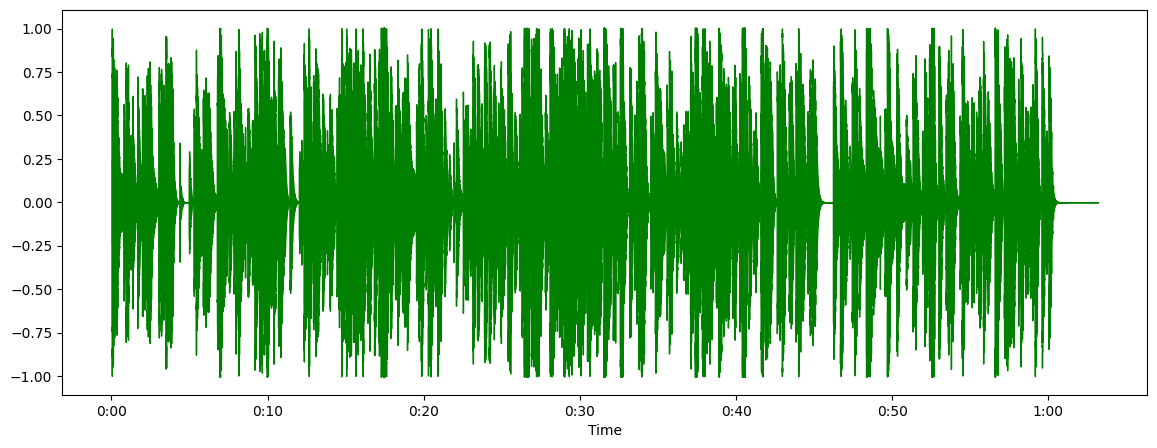

In [432]:
# Print waveform of the audio file

data_music, sr = librosa.load(prediction_filename)
plt.figure(figsize=(14, 5))
librosa.display.waveshow(data_music, sr=sr, color='green')
plt.show()

In [433]:
# plt.figure(figsize=(14,5))
# plt.plot(data_music[start:end], color=color[predict[0]])
# plt.title(f'Zero Crossing Rate for Genre {convertor.inverse_transform(predict)[0]}')
# plt.grid()

# zero_cross_rate = librosa.zero_crossings(data_music[start:end], pad=False)
# print("The number of zero-crossing is : ", sum(zero_cross_rate))
# plt.show()

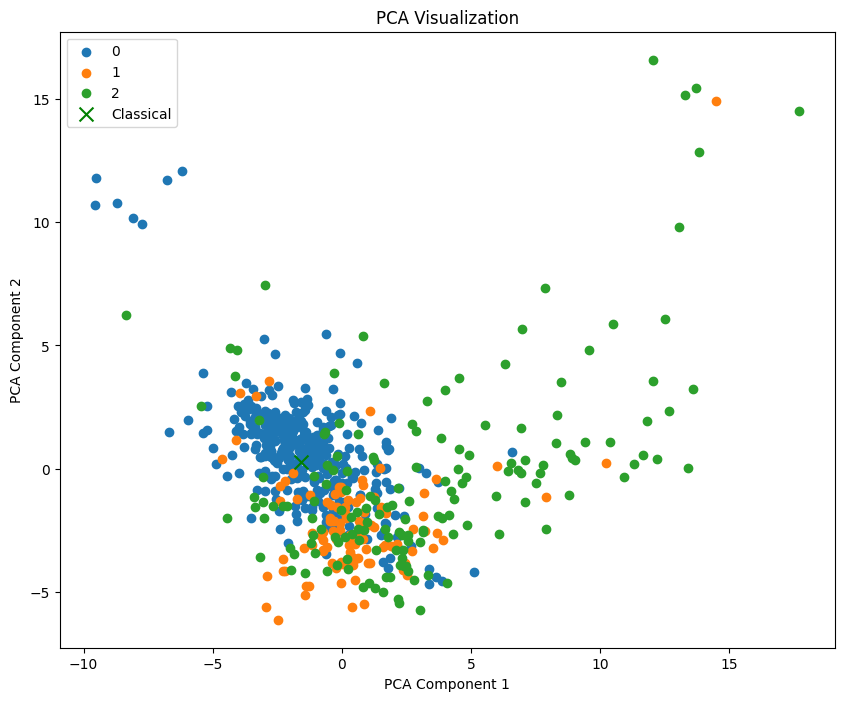

In [434]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
X1_pca=pca.transform(features.reshape(1,-1))

# Create a scatter plot of the PCA components
plt.figure(figsize=(10, 8))
for label in np.unique(y):
    plt.scatter(X_pca[y == label, 0], X_pca[y == label, 1], label=label)

# Plot X1_pca - having only a single element
plt.scatter(X1_pca[0,0], X1_pca[0,1], color=color[predict[0]], marker='x', s=100, label=convertor.inverse_transform(predict)[0])

plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA Visualization')
plt.legend()
plt.show()
